In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
tmp_rootdir = '/content/gdrive/My Drive/EEG/'
result_dir = tmp_rootdir + 'results/'
result_list = [str(i) for i in range(1,11)]

subj_list = ['001','002','003','004','005','006','007','008','009','010',
             '011','015','016',
             '021','022','024','025','027','029','030',
             '031','032','033']

In [0]:
def read_result(result_idx):
  CV_can = pd.read_csv(result_dir + "result%s/" %result_idx + "CV_can.csv", index_col=0)
  CV_rev = pd.read_csv(result_dir + "result%s/" %result_idx + "CV_rev.csv", index_col=0)

  return CV_can, CV_rev

In [0]:
can_1, rev_1 = read_result(1)
for i in range(2,len(result_list)+1):
  can_i, rev_i = read_result(i)
  can_1 = pd.concat([can_1, can_i], axis=1)
  rev_1 = pd.concat([rev_1, rev_i], axis=1)

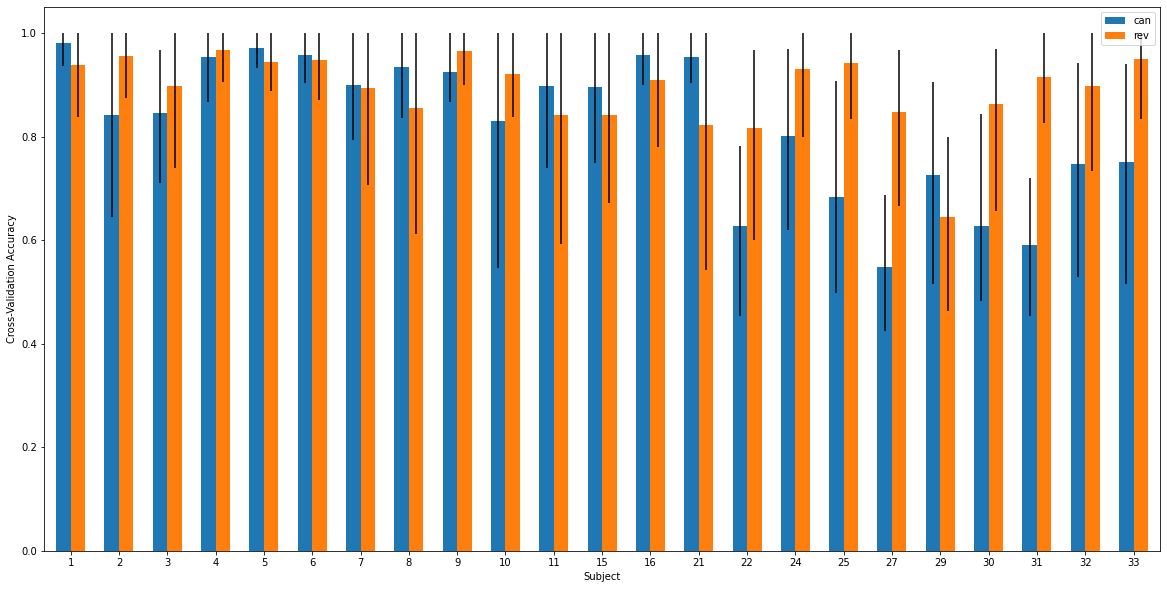

In [0]:
combine_df = pd.DataFrame({'can': can_1.mean(axis=1), 'rev': rev_1.mean(axis=1)})
CI_can = (can_1.mean(axis=1)-can_1.quantile(0.1, axis=1), can_1.quantile(0.9, axis=1)-can_1.mean(axis=1))
CI_rev = (rev_1.mean(axis=1)-rev_1.quantile(0.1, axis=1), rev_1.quantile(0.9, axis=1)-rev_1.mean(axis=1))

fig = combine_df.plot.bar(rot=0, figsize = (20, 10), width = 0.6, yerr={"can":CI_can,"rev":CI_rev})
fig.set_ylabel("Cross-Validation Accuracy")
fig.set_xlabel("Subject")
plt.show()

In [0]:
can_1

,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5
1,1.000000,0.774194,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.843750,1.000000,0.967742,1.000000,1.000000,0.968750,1.000000,1.000000,1.000000,1.000000,1.000000,0.967742,1.000000,0.967742,0.903226,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.903226,1.000000,0.967742,1.000000,0.935484,1.000000,0.967742,0.967742,1.000000,1.000000,1.000000,0.967742,1.000000,1.000000,1.000000,1.000000,1.000000,0.935484
2,0.656250,0.709677,0.903226,0.516129,1.000000,0.781250,0.870968,0.870968,0.935484,0.935484,0.812500,0.806452,0.645161,0.903226,0.774194,0.781250,0.483871,0.935484,0.677419,0.677419,0.593750,0.612903,0.870968,0.838710,0.645161,0.968750,0.870968,0.967742,0.903226,0.967742,1.000000,0.806452,1.000000,1.000000,1.000000,0.875000,0.806452,0.935484,0.741935,0.774194,0.968750,0.967742,0.870968,0.967742,0.870968,1.000000,0.870968,0.741935,1.000000,1.000000
3,0.906250,0.741935,0.483871,0.903226,0.838710,0.843750,0.838710,0.774194,0.870968,0.806452,0.968750,0.774194,0.774194,0.677419,0.806452,0.750000,0.709677,0.709677,0.935484,0.935484,0.750000,0.741935,0.709677,0.935484,0.838710,0.906250,0.580645,0.935484,0.967742,1.000000,0.906250,0.806452,0.903226,0.935484,0.935484,0.875000,0.806452,0.838710,0.741935,0.935484,0.937500,0.935484,0.838710,0.967742,0.967742,0.875000,0.774194,0.935484,0.967742,0.935484
4,1.000000,0.967742,1.000000,1.000000,1.000000,1.000000,0.838710,0.806452,0.838710,1.000000,0.968750,0.838710,1.000000,0.967742,0.967742,1.000000,1.000000,0.967742,0.935484,1.000000,0.625000,0.935484,1.000000,0.935484,1.000000,1.000000,0.935484,1.000000,0.870968,0.967742,0.937500,1.000000,1.000000,0.870968,1.000000,0.968750,1.000000,0.967742,1.000000,0.967742,1.000000,1.000000,0.935484,0.935484,0.967742,0.968750,0.967742,1.000000,0.935484,0.935484
5,0.968750,1.000000,0.967742,0.967742,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.903226,1.000000,0.903226,1.000000,1.000000,0.935484,1.000000,0.967742,0.968750,1.000000,0.709677,0.870968,1.000000,0.968750,0.935484,1.000000,1.000000,1.000000,0.968750,0.967742,1.000000,0.967742,0.967742,1.000000,1.000000,0.903226,0.935484,1.000000,1.000000,0.935484,1.000000,0.967742,1.000000,1.000000,0.935484,1.000000,1.000000,0.967742
6,1.000000,1.000000,1.000000,0.967742,1.000000,0.968750,1.000000,0.935484,1.000000,1.000000,0.562500,0.903226,1.000000,0.903226,0.967742,1.000000,0.838710,0.903226,0.967742,0.967742,0.781250,0.903226,1.000000,1.000000,0.645161,1.000000,0.967742,0.967742,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.935484,0.968750,1.000000,1.000000,1.000000,1.000000,0.937500,1.000000,0.967742,1.000000,0.967742,1.000000,1.000000,0.967742,0.967742,1.000000
7,0.911765,0.970588,0.852941,0.823529,0.939394,0.911765,1.000000,0.970588,0.941176,0.969697,0.941176,0.852941,0.794118,0.941176,1.000000,0.882353,0.647059,0.852941,1.000000,0.939394,0.617647,0.529412,0.911765,0.676471,0.848485,0.970588,1.000000,1.000000,1.000000,0.939394,0.941176,0.941176,0.823529,0.970588,0.969697,0.970588,0.823529,0.970588,0.794118,0.818182,0.941176,0.941176,0.941176,0.823529,0.939394,0.911765,0.970588,0.941176,1.000000,0.878788
8,0.937500,0.903226,1.000000,0.967742,1.000000,0.968750,0.967742,0.967742,0.870968,0.935484,0.968750,0.838710,0.741935,0.903226,0.967742,0.875000,0.935484,0.806452,0.903226,0.903226,0.812500,0.967742,0.935484,0.967742,0.774194,1.000000,1.000000,0.967742,0.870968,0.967742,0.937500,0.903226,0.967742,0.967742,1.000000,0.968750,1.000000,1.000000,0.806452,0.935484,0.968750,0.967742,1.000000,1.000000,0.903226,0.906250,0.967742,0.935484,0.967742,1.000000
9,0.937500,0.967742,1.000000,0.967742,0.838710,0.937500,0.935484,0.967742,0.967742,0.903226,0.687500,0.967742,0.903226,0.967742,0.967742,0.875000,0.870968,0.870968,0.967742,0.870968,0.812500,0.677419,0.870968,0.967742,0.838710,0.968750,0.903226,0.935484,1.000000,1.000000,0.875000,0.

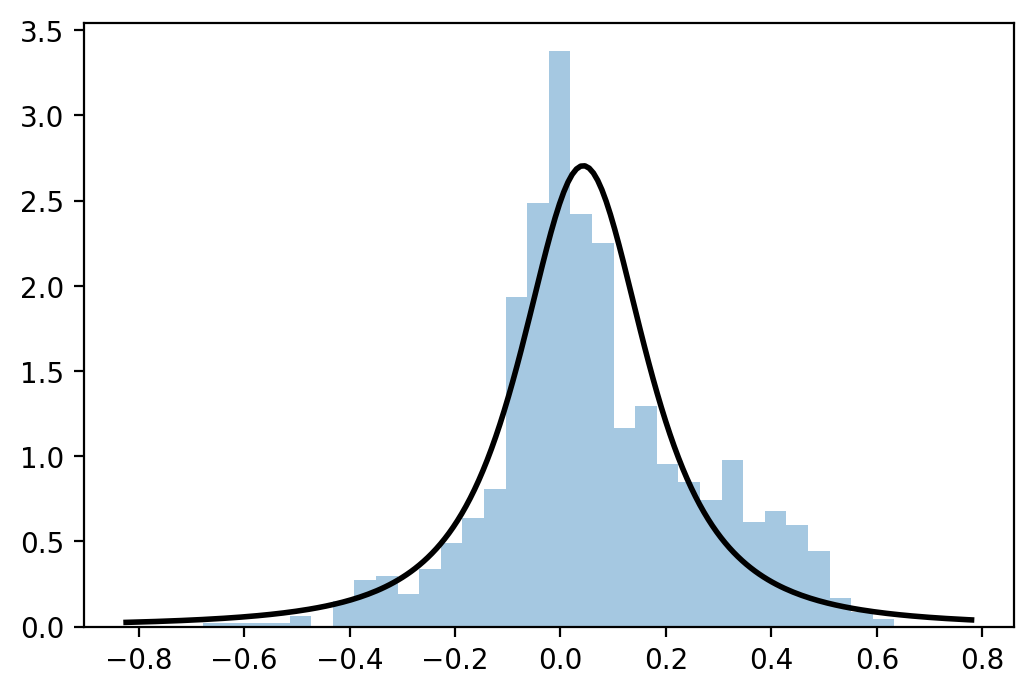

In [0]:
import seaborn as sns
from scipy import stats
class FixedT(stats.distributions.t_gen):
    df = 2
    def fit(self, *args, **kwargs):
        return stats.t.fit(*args, fix_df=self.df, **kwargs)

sns_fig= sns.distplot(rev_1-can_1, fit=FixedT(), kde=False,norm_hist=True,
             fit_kws={"color": "k", "lw": 2, "label": "t-Distribution"})
#sns.ylabel("Frequncy")
# plt.xlabel("Accuracy difference")
#plt.hist(can_1-rev_1, density=True)
fig = sns_fig.get_figure()
fig.set_dpi(200)
fig.show()
fig.savefig(result_dir+"t.dist.png", dpi = 200)

In [0]:
t_stat = np.array(stats.ttest_ind(rev_1, can_1, equal_var=True, axis=1))
# p-value???
p_values = np.round(stats.t.cdf(t_stat[0], df=2), 2)
for i in range(len(p_values)):
  if p_values[i] <= 0.05:
    print("Subject", subj_list[i], "has p-value less than 0.05", p_values[i])


Subject 001 has p-value less than 0.05 0.04
Subject 008 has p-value less than 0.05 0.04
Subject 016 has p-value less than 0.05 0.05
Subject 021 has p-value less than 0.05 0.02
Subject 029 has p-value less than 0.05 0.05


In [0]:
p_values

array([0.04, 0.98, 0.94, 0.81, 0.1 , 0.29, 0.43, 0.04, 0.96, 0.96, 0.09,
       0.09, 0.05, 0.02, 0.99, 0.98, 1.  , 1.  , 0.05, 0.99, 1.  , 0.99,
       0.99])

In [0]:
stats.t.cdf(np.array(stats.ttest_ind(rev_1.values.flatten(), can_1.values.flatten(), equal_var=True))[0], df=2)

0.9955501859506086